In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [16]:
data.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [17]:
print(data['play'].unique())

['no' 'yes']


In [19]:
from sklearn.preprocessing import LabelEncoder
for col in ['outlook', 'temp', 'humidity', 'windy', 'play']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    data
    print (data['outlook'], data['temp'], data['humidity'], data['windy'], data['play'])

0     2
1     2
2     0
3     1
4     1
5     1
6     0
7     2
8     2
9     1
10    2
11    0
12    0
13    1
Name: outlook, dtype: int32 0      hot
1      hot
2      hot
3     mild
4     cool
5     cool
6     cool
7     mild
8     cool
9     mild
10    mild
11    mild
12     hot
13    mild
Name: temp, dtype: object 0       high
1       high
2       high
3       high
4     normal
5     normal
6     normal
7       high
8     normal
9     normal
10    normal
11      high
12    normal
13      high
Name: humidity, dtype: object 0     False
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
Name: windy, dtype: bool 0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object
0     2
1     2
2     0
3     1
4     1
5     1
6     0
7     2
8     2
9     1
10    2
11    0
12    0
13   

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int32
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   windy     14 non-null     int64
 4   play      14 non-null     int32
dtypes: int32(4), int64(1)
memory usage: 468.0 bytes


In [21]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [22]:
# data x dan y nya
x = data.drop('play', axis = 1)
y = data['play']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [33]:
print (x_train)

    outlook  temp  humidity  windy
13        1     2         0      1
9         1     2         1      0
1         2     1         0      1
7         2     2         0      0
10        2     2         1      1
3         1     2         0      0
0         2     1         0      0
5         1     0         1      1
12        0     1         1      0


In [34]:
print (y_train)

13    0
9     1
1     0
7     0
10    1
3     1
0     0
5     0
12    1
Name: play, dtype: int32


In [35]:
print (x_test)

    outlook  temp  humidity  windy
8         2     0         1      0
6         0     0         1      1
4         1     0         1      0
11        0     2         0      1
2         0     1         0      0


In [36]:
print (y_test)

8     1
6     1
4     1
11    1
2     1
Name: play, dtype: int32


In [37]:
from sklearn.naive_bayes import GaussianNB
model_Nb = GaussianNB()
model_Nb = model_Nb.fit(x_train, y_train)

In [38]:
predict = model_Nb.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
print ("Akurasi scorenya sebesar : ", accuracy_score(y_test, predict)*215)

Akurasi scorenya sebesar :  86.0


In [55]:
x_baru = ([[0,2,1,0]])

In [56]:
prediksi_baru = model_Nb.predict(x_baru)
print (prediksi_baru)

[1]


C:\Users\angga\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [57]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=3)
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
predict_DT = model_DT.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
print ("Akurasi scorenya sebesar : ", accuracy_score(y_test, predict_DT)*430)

Akurasi scorenya sebesar :  86.0


In [63]:
x_baru_DT = ([[0,2,1,0]])

In [64]:
prediksi_baru_DT = model_DT.predict(x_baru_DT)
print (prediksi_baru_DT)

[1]


C:\Users\angga\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


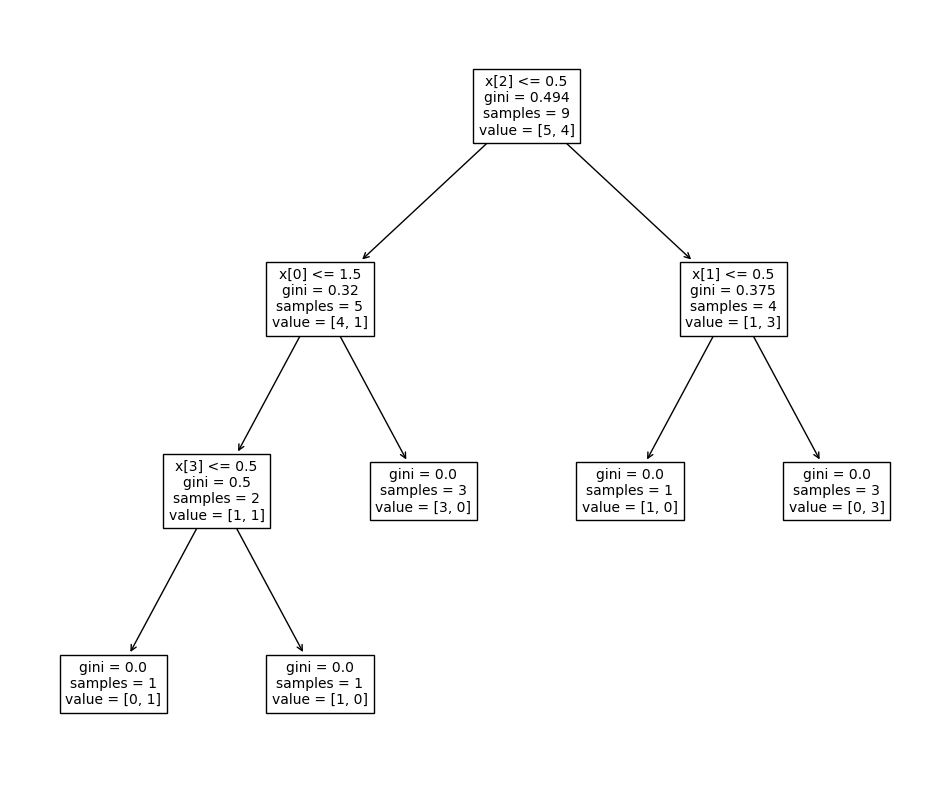

In [66]:
from sklearn.tree import plot_tree

plt.subplots(figsize=(12,10))
plot_tree (model_DT, fontsize = 10)
plt.show()

In [67]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [71]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
print ("Akurasi scorenya sebesar : {}".format(knn.score(x_test, y_test)*450))

Akurasi scorenya sebesar : 90.0
